<a href="https://colab.research.google.com/github/sabrinasforza/Portfolio/blob/main/University_project_2_regression_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS985 Assignment 1
# Team Name: Regressor's Assemble 
## Team Members: Gregor Dewhirst, Paddy Smith, Sabrina Sforza, Sam Kuriakose Thomas, Thomas Lancaster

# Regression Problem 

## Introduction 

For the regression task in this project, we will be examining a dataset containing songs and their characteristics extrapolated from Spotify and will build a model predicting the popularity scores of songs in the test set.

Firstly, the sets were imported from Kaggle and loaded to the Notebook.

In [ ]:
#importing necessary packages 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [ ]:
#importing the training and testing sets 
spotify_train = pd.read_csv (r'C:\\Users\\sabri\\Downloads\\CS98XRegressionTrain.csv', low_memory=False)
spotify_test = pd.read_csv (r'C:\\Users\\sabri\\Downloads\\CS98XRegressionTest.csv', low_memory=False)

## Exploratory analysis of the dataset 

A heatmap of the training set was plotted in order to explore initial correlations between the variables. It was observed that the popularity variable ('pop') displayed a negative correlation with the acousticness of a song and slightly positive correlation with other variables. These relationships have been plotted in turn. 

After further observation, it was decided that bpm, energy, dance, live, valence, duration, acousticness and speechiness would be used as predictors, as they displayed a minimal correlation with popularity. The Id, title, artist, top genre, and year columns were not used as predictors since we wanted to focus on the technical characteristics of a song to determine its popularity score. 

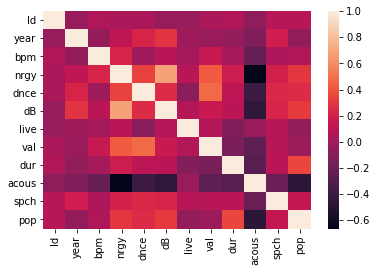

In [ ]:
#heatmap of the variables in the training set 
corr = spotify_train.corr()
sns.heatmap(corr) 
plt.show()

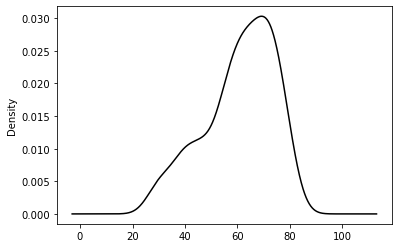

In [ ]:
#distribution of our dependent variable 
popularity = spotify_train["pop"] 
popularity.plot.density(color = 'black') 
plt.show()

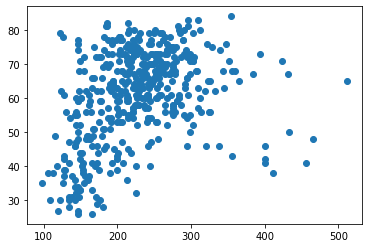

In [ ]:
#small correlation shown
plt.scatter(spotify_train['dur'], spotify_train['pop'], alpha = 1, marker = 'o')
plt.show()

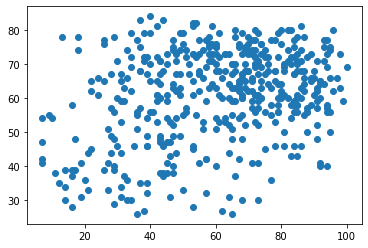

In [ ]:
plt.scatter(spotify_train['nrgy'], spotify_train['pop'], alpha = 1, marker = 'o')
plt.show()

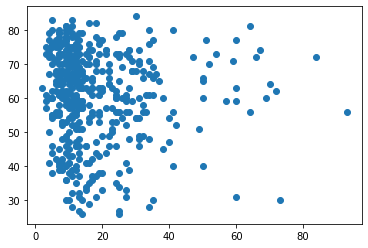

In [ ]:
plt.scatter(spotify_train['live'], spotify_train['pop'], alpha = 1, marker = 'o')
plt.show()

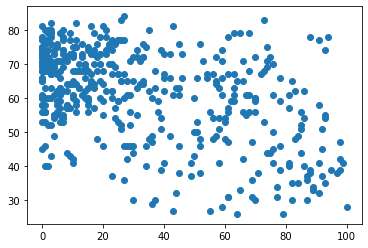

In [ ]:
plt.scatter(spotify_train['acous'], spotify_train['pop'], alpha = 1, marker = 'o')
plt.show()

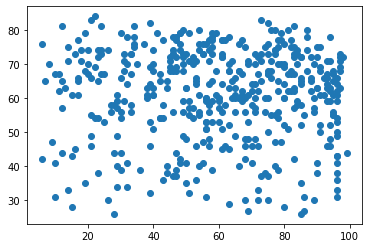

In [ ]:
plt.scatter(spotify_train['val'], spotify_train['pop'], alpha = 1, marker = 'o')
plt.show()

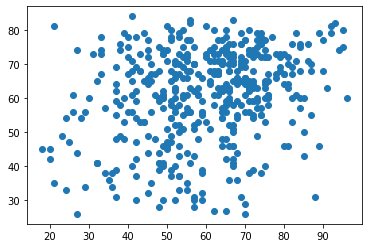

In [ ]:
plt.scatter(spotify_train['dnce'], spotify_train['pop'], alpha = 1, marker = 'o')
plt.show()

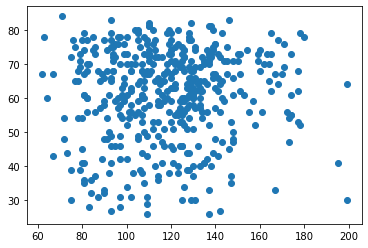

In [ ]:
plt.scatter(spotify_train['bpm'], spotify_train['pop'], alpha = 1, marker = 'o')
plt.show()

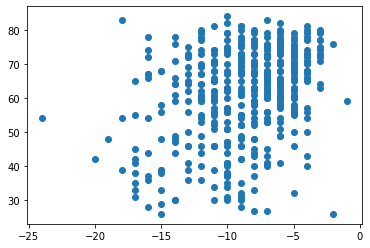

In [ ]:
plt.scatter(spotify_train['dB'], spotify_train['pop'], alpha = 1, marker = 'o')
plt.show()

## Preparing the data 

After conducting the initial analysis, the data has been prepared to fit the models. 

In [ ]:
#checking for missing values 
spotify_train.isnull().sum()

Id            0
title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [ ]:
#dropping missing values 
spotify_train = spotify_train.dropna()

In [ ]:
#dropping columns that we won't use as predictors for training set
spotify_num = spotify_train.drop('title', axis = 1)
spotify_num = spotify_num.drop('artist', axis = 1)
sp_num_tr = spotify_num.drop('year', axis = 1)
sp_num_tr = sp_num_tr.drop('top genre', axis = 1)
sp_num_tr = sp_num_tr.drop('Id', axis = 1)
sp_num_tr = sp_num_tr.drop('dB', axis = 1)

sp_num_tr

,bpm,nrgy,dnce,live,val,dur,acous,spch,pop
0,107,31,45,13,28,150,75,3,44
2,105,36,63,13,67,245,11,3,77
3,170,28,47,13,33,232,25,3,67
4,121,47,56,15,40,193,45,3,63
5,110,56,71,12,23,223,15,6,74
...,...,...,...,...,...,...,...,...,...
448,80,22,18,10,16,214,92,4,45
449,148,81,53,23,96,147,50,3,50
450,168,55,73,20,61,289,23,14,77
451,165,87,64,6,88,191,5,8,62


In [ ]:
#dropping columns that we won't use as predictors for testing set
spotify_num = spotify_test.drop('title', axis = 1)
spotify_num = spotify_num.drop('artist', axis = 1)
sp_num_te = spotify_num.drop('year', axis = 1)
sp_num_te = sp_num_te.drop('top genre', axis = 1)
sp_num_te = sp_num_te.drop('Id', axis = 1)
sp_num_te = sp_num_te.drop('dB', axis = 1)

sp_num_te

,bpm,nrgy,dnce,live,val,dur,acous,spch
0,154,93,65,75,74,213,1,18
1,161,39,30,11,14,292,26,3
2,64,46,27,12,18,179,38,3
3,127,92,71,37,53,216,6,4
4,115,46,56,21,34,153,18,3
...,...,...,...,...,...,...,...,...
109,125,57,61,38,76,209,3,47
110,130,89,67,10,80,215,4,3
111,84,58,78,14,76,253,43,27
112,127,97,72,12,73,287,6,14


In [ ]:
#converting array back to dataframe for training set
sp_num_tr = pd.DataFrame(sp_num_tr)

In [ ]:
#converting array back to dataframe for testing set 
sp_num_te = pd.DataFrame(sp_num_te)

In [ ]:
#renaming the columns in the training set
sp_num_tr = sp_num_tr.rename(columns= {0:'bpm', 1:'nrgy', 2:'dnce', 3:'live', 4:'val', 5:'dur', 6:'acous', 7:'spch', 8:'pop'})

In [ ]:
#renaming the columns in the testing set 
sp_num_te = sp_num_te.rename(columns= {0:'bpm', 1:'nrgy', 2:'dnce', 3:'live', 4:'val', 5:'dur', 6:'acous', 7:'spch',})

## Choosing targets and predictors

The 'pop' column was chosen as the y_train variable. The predictors were assigned to x_train and x_test respectively. 

In [ ]:
#setting target variable
y_train = sp_num_tr.pop('pop')

In [ ]:
#setting the predictors for training set
x_train = sp_num_tr

In [ ]:
#setting predictors for testing set 
x_test = sp_num_te

## Model 1: Multiple linear regression 

The first model we decided to apply is Multiple Linear Regression. 
Given the minor linear relations shown between popularity and the predictors, it was decided to start with a multiple linear regression model in order to quantify these relations. 

In [ ]:
#multiple linear regression
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

regression_model.fit(x_train, y_train)


#fitting the model to the test set 
regr_preds = regression_model.predict(x_test)

In [ ]:
#converting the predictions to a pandas DataFrame to be downloaded
regr_preds= pd.DataFrame(regr_preds)

In [ ]:
#downloading the csv file to be submitted to Kaggle
regr_preds.to_csv('multipleRegression_pred.csv')

In [ ]:
#multiple linear regression on training set 
regression_model_tr = LinearRegression()
regression_model_tr.fit(x_train, y_train)

regr_preds_tr = regression_model_tr.predict(x_train)

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_train, regr_preds_tr)
lin_rmse = np.sqrt(lin_mse)
print("The RMSE for Linear Regression on training set is", lin_rmse)

The RMSE for Linear Regression on training set is 10.847191286383497


## Results 
The linear regression model applied on the test set obtained a score of 9.25 on the Kaggle competition, whereas the model applied to the training set obtained a Root Mean Squared Error of 10.85. 
This result is likely due to the higher number of observations dispersed within the training set producing a weaker line of best fit. Therefore, it was decided to explore some more advanced algorithms to try and find a more acceptable line of best fit.

## Model 2: Support Vector Regression 

Support Vector Regression is a versatile algorithm which supports nonlinear regression, suitable for medium and small sized datasets.

The aim of SVR is to fit as many instances as possible on the line of best fit - the 'street' - while limiting margin violations - instances off the line. The width of the street - the margin of error - is set through epsilon. C controls regularisation and a higher value allows for higher tolerance for violations and vice versa. 
As the data in question is nonlinear, an RBF kernelized SVM model will be used. The gamma hyperparameter controls how much influence each instance has on the final predictions. 

## Retrieving the best hyperparameters 

GridSearchCV retrieves the best hyperparameters C, epsilon, and gamma. The param_grid specifies the values within which to choose from based on the mean squared error. The range of values was chosen arbitrarily from values we thought would be appropriate given the size and the shape of the datasets. 

The grid search suggestions have been applied to the SVR and generate the lowest RMSE score for the test set.

In [ ]:
#retriving best hyperparameters using GridSearchCV() for SVR
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

grid = GridSearchCV(estimator=SVR(kernel='rbf'),
                    param_grid={'C': [50, 80, 100, 150, 200],
                                'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
                                'gamma': ["scale", "auto", 12.0],
                               },
                    cv=5, scoring='neg_mean_squared_error')

grid.fit(x_train, y_train)

grid.best_params_

{'C': 50, 'epsilon': 0.5, 'gamma': 'scale'}

In [ ]:
#SVR on test set
svm_reg = SVR(epsilon=0.5, C=50, kernel ="rbf", gamma = "scale")
svm_reg.fit(x_train, y_train)
SVR_preds_2 = svm_reg.predict(x_test)

In [ ]:
SVR_preds_2 = pd.DataFrame(SVR_preds_2)

In [ ]:
SVR_preds_2.to_csv('SVR_preds_2.csv')

In [ ]:
#SVR on training set to compare the results 
svm_reg_tr = SVR(epsilon=0.5, C=50, kernel ="rbf", gamma = "scale")
svm_reg_tr.fit(x_train, y_train)
SVR_preds_tr = svm_reg.predict(x_train)

from sklearn.metrics import mean_squared_error
lin_mse_SVR = mean_squared_error(y_train, SVR_preds_tr)
lin_rmse_SVR = np.sqrt(lin_mse_SVR)
print("The RMSE for Support Vector Regression on training set is", lin_rmse_SVR)

The RMSE for Support Vector Regression on training set is 10.134901966637855


## Results 

The RMSE for Support Vector Regression is 8.62 on the test set and 10.13 on the training set. 

An RMSE for testing set lower than that of the testing set could be due to underfitting, which indicates a poor performance on the training data and the difficulty to generalise the predictions to new data in the testing set. 
In order to address underfitting, the complexity of the model should be increased by adding more parameters. However, due to time constraints we were unable to further improve our SVR model. 

## Model 3: Decision Tree Regressor 

Decision Trees are flexible machine learning algorithms that can be applied for regression.The algorithm builds a tree predicting values in each node and makes its predictions based on the lowest possible mean squared error.

DT are prone to overfitting so there needs to be hyperparameter constraints, which may help with generalisation and performance on the testing set.

## Retrieving the best hyperparameters 

GridSearchCV has also been employed for the Decision Tree Regressor. 

In [ ]:
#retriving best hyperparameters using GridSearchCV() for Decision Tree Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid={
    "min_samples_leaf":[2,4,6,8,10],
    "max_depth":[2,3,4,5,6,7,None],
    "max_leaf_nodes":[4,6,8,10,12],
    "max_features":[1,2,3,4,5,6,7,8]}

reg_tree = DecisionTreeRegressor()
grid_search = GridSearchCV(reg_tree, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': None,
 'max_features': 7,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 10}

In [ ]:
#decision tree regressor on test set 
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(min_samples_leaf = 10, max_depth = None, max_features = 7, max_leaf_nodes = 6)
tree_reg.fit(x_train,y_train)
DT_preds = tree_reg.predict(x_test)

In [ ]:
#converting predictions to DataFrame
DT_preds= pd.DataFrame(DT_preds)

In [ ]:
#creating the csv file for download
DT_preds.to_csv('DT_preds.csv')

In [ ]:
#decision tree regressor on train set 
tree_reg = DecisionTreeRegressor(min_samples_leaf = 8, max_depth = 2, max_features = 4, max_leaf_nodes = 6)
tree_reg.fit(x_train,y_train)
DT_preds_train = tree_reg.predict(x_train)

#calculating and printing the RMSE
lin_mse_DT = mean_squared_error(y_train, DT_preds_train)
lin_rmse_DT = np.sqrt(lin_mse_DT)
print("The RMSE for Decision Tree Regressor on training set is", lin_rmse_DT)

The RMSE for Decision Tree Regressor on training set is 10.776977591706107


## Results 

The RMSE for Decision Tree Regressor is 8.87 for the test set and 10.78 for the training data.

This may indicate overfitting. The algorithm may be improved by employing Random Forests. However, due to the small size of the dataset in question, the latter would have not been appropriate for this task. Perhaps it would have been worth exploring the use of additional hyperparameters such as random_state and min_impurity_decrease more in depth to improve the algorithm.

# Classification Problem

For the classification task, the aim is to build a model which predicts the genre of the 113 songs in the test set, based on the a set of 13 attributes of 453 in the training set. 


## Import Library 

In [ ]:
import pandas as pd # data processing 
import numpy as np # math computation
import matplotlib.pyplot as plt  #data visualisation
import sklearn
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sb
import warnings; warnings.simplefilter('ignore')

## Reading Data 



In [ ]:
train = pd.read_csv('CS98XClassificationTrain.csv')

In [ ]:
train.head(10)

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
5,6,Grenade,Bruno Mars,2010,110,56,71,-7,12,23,223,15,6,74,pop
6,7,No Time,The Guess Who,1971,128,48,48,-14,5,12,219,8,6,44,album rock
7,8,End Of The Road,Boyz II Men,1991,150,43,64,-9,6,53,351,7,2,71,boy band
8,9,Someone Elses Roses,Joan Regan,2019,100,14,29,-10,15,32,143,89,3,34,NaN
9,10,You Belong to My Heart,Timi Yuro,2013,108,39,46,-10,16,50,126,82,3,35,adult standards


In [ ]:
test = pd.read_csv('CS98XClassificationTest.csv')

## Cleaning and preparing the data
Firstly, the training and testing needed to be cleaned, removing null values and irrelevant columns. Null values were only identified in 'top genre' column on the training set, leading to 15 rows to be removed. Irrelevant columns were dropped, including 'Id', 'Artist' and 'Title', as it was assumed that these attributes have limited association with a songs genre. 


In [ ]:
train.isnull().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

In [ ]:
test.isnull().sum()

Id        0
title     0
artist    0
year      0
bpm       0
nrgy      0
dnce      0
dB        0
live      0
val       0
dur       0
acous     0
spch      0
pop       0
dtype: int64

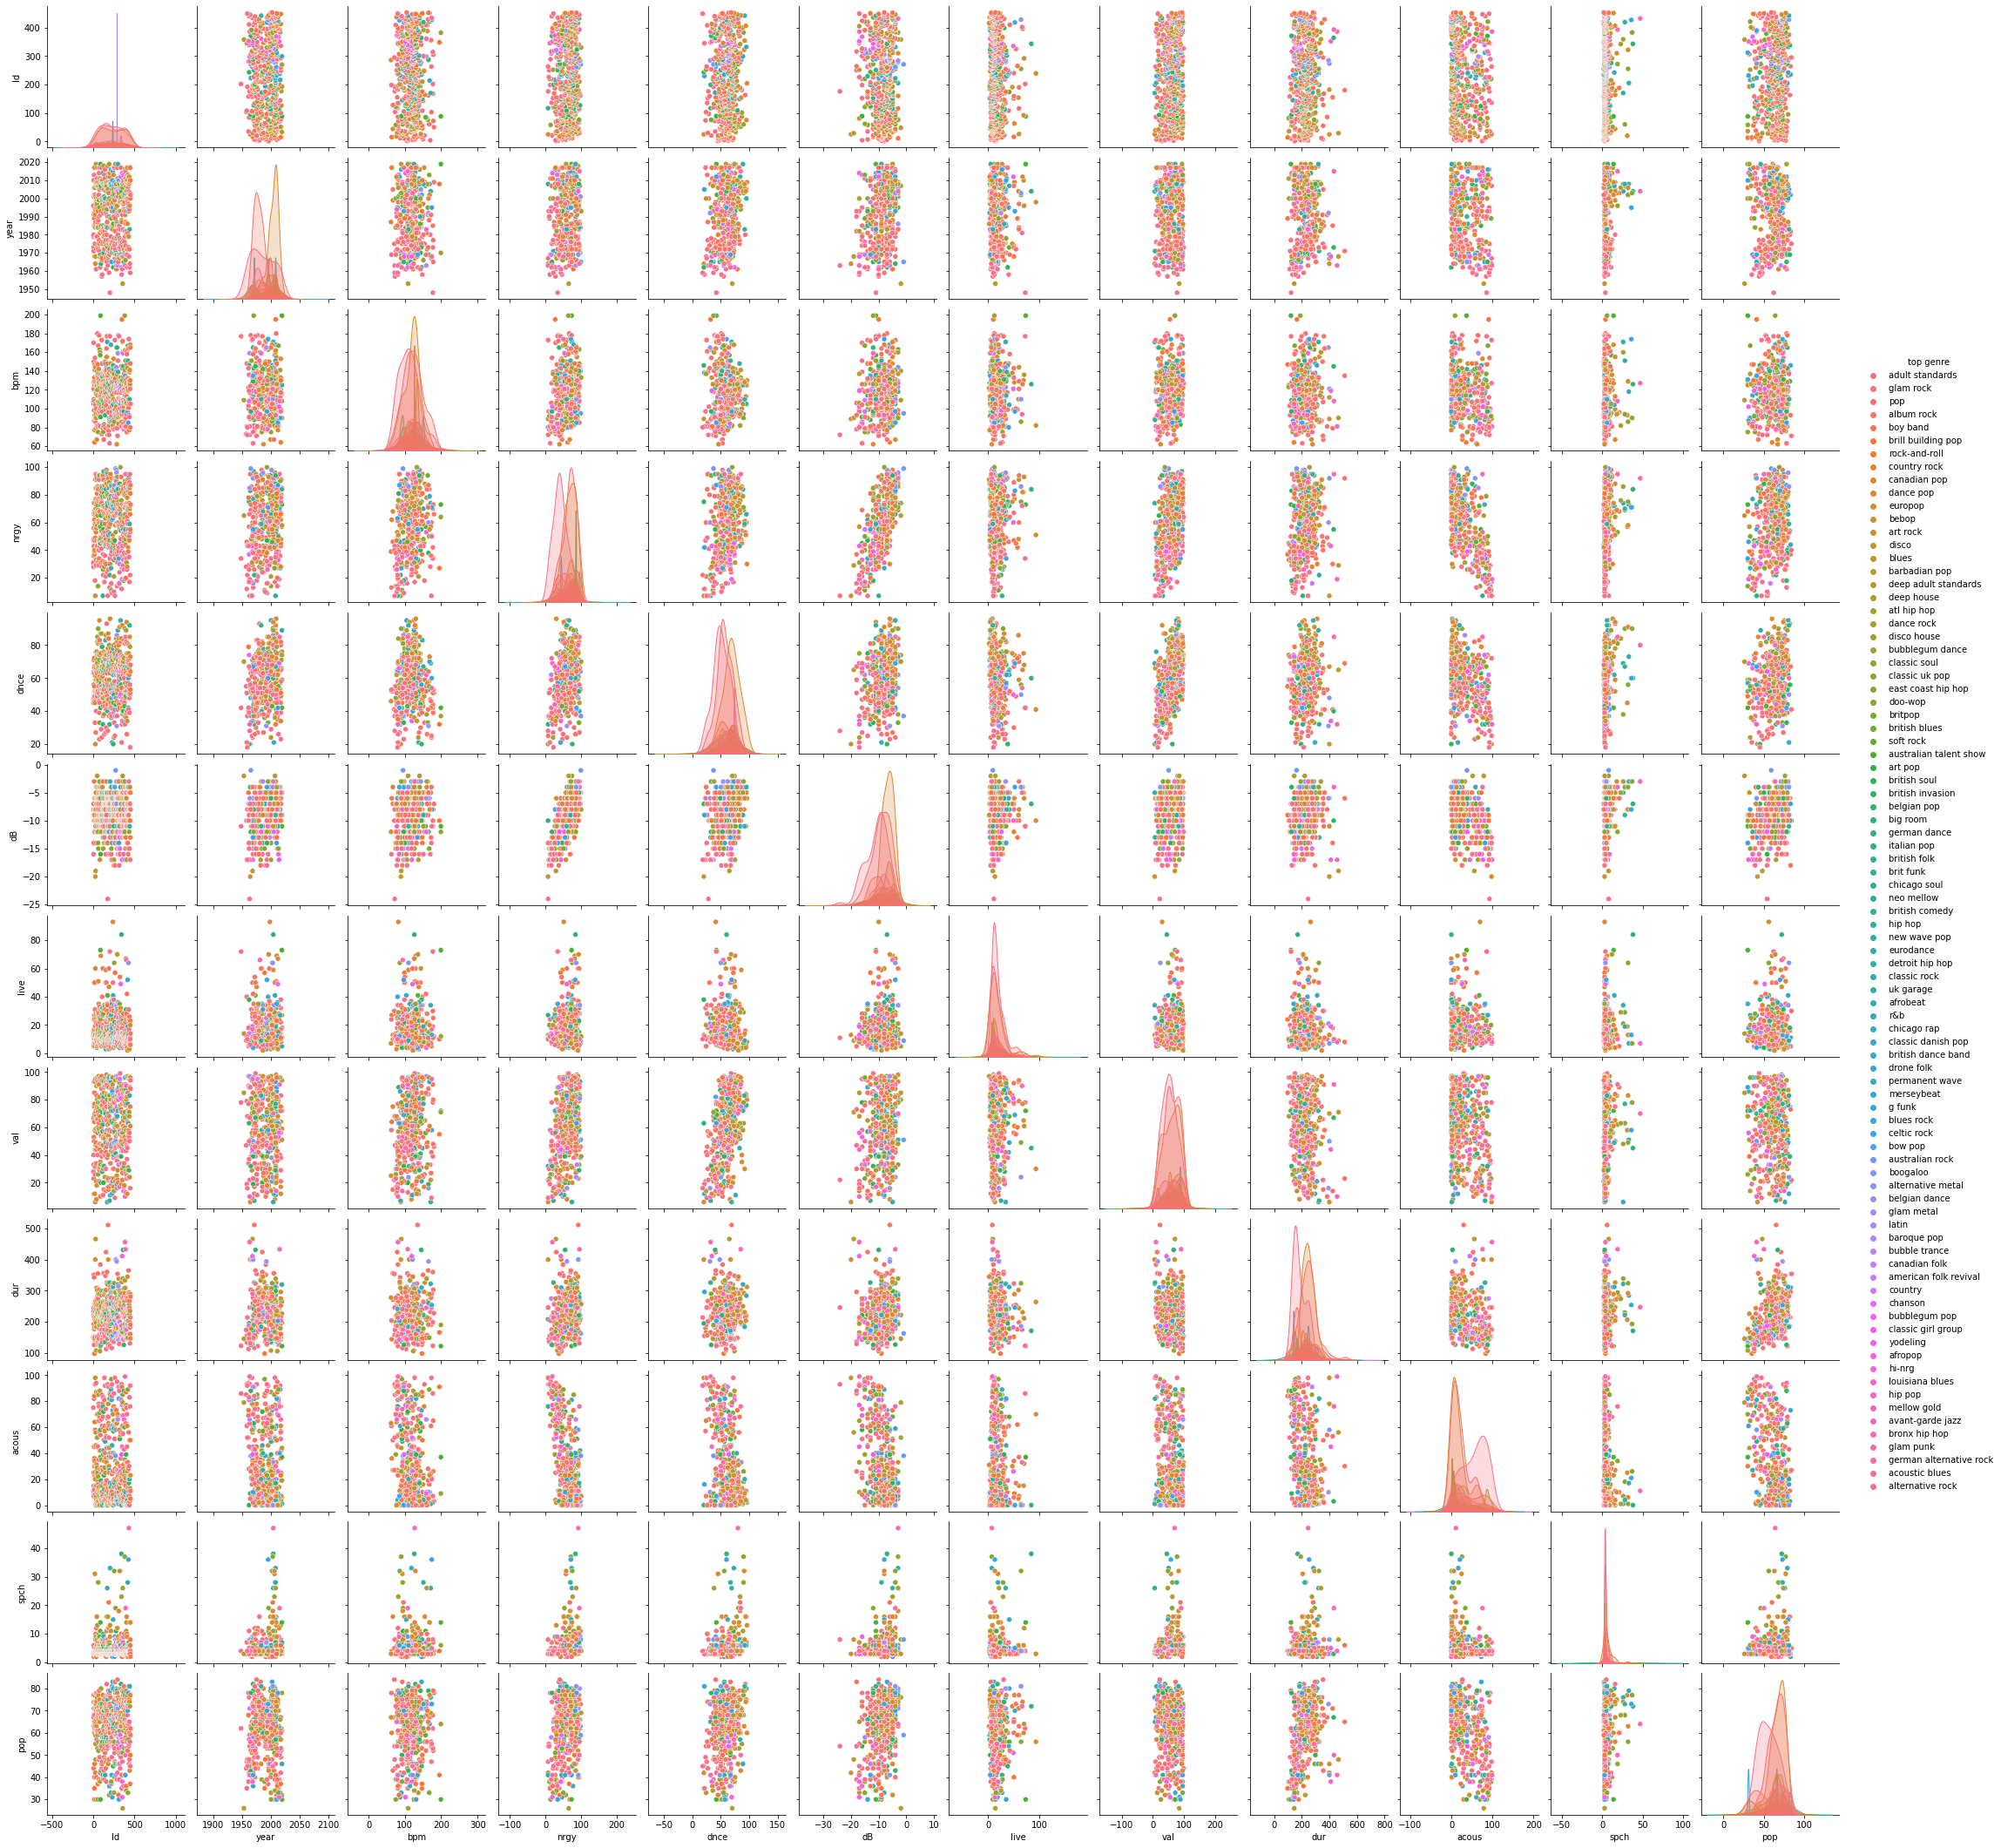

In [ ]:
#pairplot of the variables
sb.pairplot(train, hue = "top genre")

In [ ]:
train = train.dropna()
y_train = train.pop('top genre')
x_train = train
x_train.drop('title', axis=1, inplace=True)
x_train.drop('artist', axis=1, inplace=True)
x_train.drop('Id', axis=1, inplace=True)

In [ ]:
x_test = test
x_test.drop('title', axis=1, inplace=True)
x_test.drop('artist', axis=1, inplace=True)
x_test.drop('Id', axis=1, inplace=True)

In [ ]:
x_test.head(10)

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,2005,154,93,65,-3,75,74,213,1,18,72
1,1994,161,39,30,-15,11,14,292,26,3,59
2,1977,64,46,27,-7,12,18,179,38,3,76
3,2010,127,92,71,-9,37,53,216,6,4,50
4,2018,115,46,56,-12,21,34,153,18,3,44
5,1986,123,68,69,-12,14,71,255,8,3,60
6,1974,104,46,31,-9,14,32,213,42,3,69
7,1982,155,44,55,-10,10,73,112,82,4,27
8,2016,116,50,58,-7,13,11,206,20,3,74
9,1979,116,91,57,-5,16,42,208,6,13,83


In [ ]:
x_train.head(10)

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1996,107,31,45,-8,13,28,150,75,3,44
2,1979,105,36,63,-9,13,67,245,11,3,77
3,1980,170,28,47,-16,13,33,232,25,3,67
4,1973,121,47,56,-8,15,40,193,45,3,63
5,2010,110,56,71,-7,12,23,223,15,6,74
6,1971,128,48,48,-14,5,12,219,8,6,44
7,1991,150,43,64,-9,6,53,351,7,2,71
9,2013,108,39,46,-10,16,50,126,82,3,35
10,2001,98,74,72,-3,17,93,224,12,3,63
11,1985,87,66,63,-9,7,75,343,12,3,68


## Model Testing and Selection
After cleaning the data, several machine learning classificaiton techniques were undertaken with minor parameter alterations. Accuracy scores were produced for each model, which divides the number of correct predictions over total predictions. OneVsRest classifier, Support Vector Machine and Decision Tree were implemented, achieveing scores shown in the line graph. The decision tree was the best performing model with 0.67.

In [ ]:
# Decision Tree 
dt = DecisionTreeClassifier(criterion='gini',max_depth=8, random_state=0)
dt.fit(x_train, y_train)
dt.predict(x_test)
dt.score(x_train, y_train)

0.6712328767123288

In [ ]:
# One vs Rest
ovr_clf = OneVsRestClassifier(LogisticRegression())
ovr_clf.fit(x_train, y_train)
ovr_clf.predict(x_test)
ovr_clf.score(x_train, y_train)

0.4908675799086758

In [ ]:
# Support Vector Machine
svm = svm.SVC(decision_function_shape='ovo')
svm.fit(x_train, y_train)
svm.predict(x_test)
svm.score(x_train, y_train)

0.15753424657534246

In [ ]:
# K-Nearest Neighbours
kn = KNeighborsClassifier(n_neighbors=90, weights='uniform')
kn.fit(x_train, y_train)
kn.predict(x_test)
kn.score(x_train, y_train)

0.3333333333333333

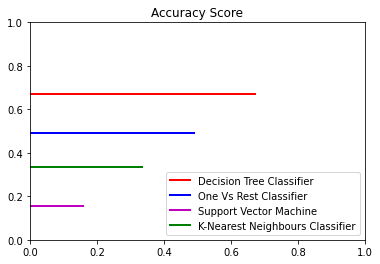

In [ ]:
##Plotting Accuracy Scores 

#variables assigned for every accuracy score
a1=dt.score(x_train, y_train)
a2= ovr_clf.score(x_train, y_train)
a3= svm.score(x_train, y_train)
a4= kn.score(x_train, y_train)
#plotting the accuracy scores with key 
plt.axhline(xmin=0,xmax=a1, y=a1, color='r', linewidth=2.0, label = 'Decision Tree Classifier')
plt.axhline(xmin=0,xmax=a2, y=a2, color='b', linewidth=2.0, label = 'One Vs Rest Classifier')
plt.axhline(xmin=0,xmax=a3, y=a3, color='m', linewidth=2.0, label = 'Support Vector Machine')
plt.axhline(xmin=0,xmax=a4, y=a4, color='g', linewidth=2.0, label = 'K-Nearest Neighbours Classifier')
plt.legend(loc='lower right')
plt.title('Accuracy Score')
plt.show()

## Feature Selection - Random Forest
After producing baseline accuracy scores, a random forest model was then performed and feature importance scores produced, in order to explore the importance of the attributes in predicting a song's top genre. Feature importance is produced by computing the average depth over all trees at which the feature appears. Important features likely to appear closer to the tree roots, whereas unimportant features appear closer to the leaves. It was found that all attributes were relatively important at predicting song genre, except for live, spch and db which scored less than 0.08 and therefore were dropped from the dataset. The value 0.08 was chosen as it would keep the most relevant features of the dataset without reducing the accuracy of the classifier models used.

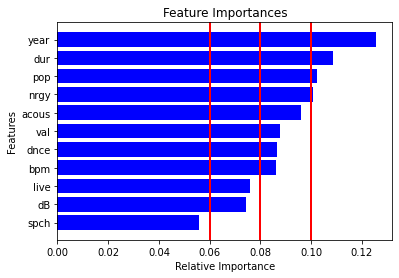

In [ ]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(x_train, y_train)

# Feature Importance
rnd_clf.feature_importances_

plt.figure(figsize=(20,15))

import matplotlib.pyplot as plt
%matplotlib inline
plt.axvline(x=0.06,ymax=1, ymin=0, color='r', linewidth=2.0)
plt.axvline(x=0.08,ymax=1, ymin=0, color='r', linewidth=2.0)
plt.axvline(x=0.1,ymax=1, ymin=0, color='r', linewidth=2.0)
features = x_train.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
# dropping unimportant features
x_test.drop('spch', axis=1, inplace=True)
x_test.drop('dB', axis=1, inplace=True)
x_test.drop('live', axis=1, inplace=True)

In [ ]:
x_train.drop('spch', axis=1, inplace=True)
x_train.drop('dB', axis=1, inplace=True)
x_train.drop('live', axis=1, inplace=True)

## Ensemble Learning

In order to improve accuracy of the classification models, ensemble learning models were built. Ensemble learning aims to combine the insights of multiple models to improve accuracy. Voting classifier, bagging, boosting and random forest were all performed, utilising previous models. It was found that random forest and votting classifier performed the best. 

Voting classifier aggregates the predictions of each individual model and then select the majority outcome. Hard voting classifier classifies data using the mode of all the predictions, whereas soft voting classifier uses the probabilities made. Hard voting classifier performed significantly better than soft. 

Random forest classifier combines multiple decision tree models, which attempt to find the best split of the data through decisions represented as branches and leaves. Whilst random forest are prone to bias and overfitting, they are widely used for classificaiton problems.

In order to compare the accuracy of the training and test set, a cross validation score was computed for the random forest model. The random forest scored 0.34 and is 0.2 points more accurate than the ensemble learning model created. The random forest model performed better on Kaggle with the test set; 0.41. This is due to the training set being larger than the test set and thus a larger margin for errors.

In [ ]:
# Random Forest
rnd_clf = RandomForestClassifier()
rnd_clf.fit(x_train, y_train)
rf_pred = rnd_clf.predict(x_test)
rnd_clf.score(x_train, y_train)

1.0

In [ ]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rnd_clf), ('OVR', ovr_clf), ('neigh', kn)],voting='hard')
voting_clf.fit(x_train, y_train)
voting_pred = voting_clf.predict(x_test)
voting_clf.score(x_train, y_train)

0.5616438356164384

In [ ]:
#Accuracy: 0.33 (+/- 0.03) [Random Forest]
#Accuracy: 0.31 (+/- 0.03) [Voting Classifier]
from sklearn.model_selection import cross_val_score
for clf, label in zip([rnd_clf, voting_clf], ['Random Forest', 'Voting Classifier']):
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=5)
        print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.32 (+/- 0.02) [Random Forest]
Accuracy: 0.34 (+/- 0.03) [Voting Classifier]


## Hypertuning the parameters

The random forest model parameters were then hypertuned using GridsearchCV, to improve accuracy. This technique loops through predefined hyperparameters, fitting the model onto the training set. Accuracy scores were produced in order to identify the most accurate set of parameters.The parameters explored were n_estimators which is the number of trees in the forest, the criterion which is the measure of quality of a split, and max_depth which is the maximum depth of the tree. The cross validaiton performed several times, adjusting the list of each parameter.

In [ ]:
rfc = RandomForestClassifier()

# List of parameters to hypertune
parameters = {
    "n_estimators":[250,350, 450,550, 650],
    "max_depth":[8,10,12,14,16, None],
    'criterion' :['gini', 'entropy'],
            }

In [ ]:
# Cross Validation of Hyperparameters
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(x_train,y_train.values.ravel())

C:\Users\padhe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12, 14, 16, None],
                         'n_estimators': [250, 350, 450, 550, 650]})

In [ ]:
# produces the mean test score for each set of parameters
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

Best parameters are: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 550}


0.358 + or -0.029 for the {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 250}
0.349 + or -0.025 for the {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 350}
0.347 + or -0.024 for the {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 450}
0.358 + or -0.029 for the {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 550}
0.345 + or -0.028 for the {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 650}
0.331 + or -0.038 for the {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 250}
0.352 + or -0.033 for the {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 350}
0.352 + or -0.032 for the {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 450}
0.345 + or -0.035 for the {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 550}
0.352 + or -0.035 for the {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 650}
0.338 + or -0.033 for the {'criterion': 'gini', 'max_depth': 12

## Final Classification Model

After identifying the most effective parameters, the random forest model was performed again showing an improved accuracy score of 0.997. The model having a higher accuracy score on the training set may be due to underfitting. However, due to the high processing power required, the amount of parameters that could be tested was limited.

In [ ]:
rnd_clf = RandomForestClassifier(max_depth = 8, n_estimators = 550, criterion = 'entropy')
rnd_clf.fit(x_train, y_train)
rf_pred = rnd_clf.predict(x_test)
rnd_clf.score(x_train, y_train)

0.997716894977169

# Final Scores 

## Regression task 

The final score for the regression task on the Kaggle in-class competition is 8.50, obtained through Support Vector Regression. 
The RMSE for each model on the test and train set can be observed in the graph below. 

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<function matplotlib.pyplot.show(close=None, block=None)>

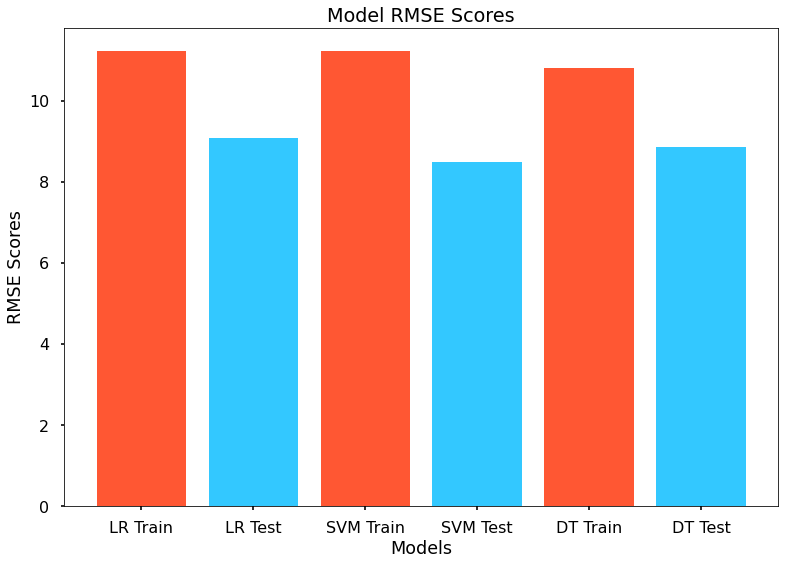

In [ ]:
#Instances of explosive violence barchart 
#Countries.value_counts()
MTrain = [11.24, 10.24, 10.81]
MTest = [9.09, 10.24, 8.87]
X_labels = ['LR Train', 'LR Test', 'SVM Train', 'SVM Test', 'DT Train', 'DT Test']
yexplosioninstances = [11.24, 9.09, 11.24, 8.50, 10.81, 8.87]
color = ['#FF5733', '#33C8FF']
plt.style.use('seaborn-poster')
plt.bar(X_labels, yexplosioninstances, color=color)
plt.legend
plt.title("Model RMSE Scores")
plt.ylabel("RMSE Scores")
plt.xlabel("Models")
print(plt.style.available)
plt.show


## Classification task 

The final score for the classification taks on the Kaggle in-class competition is 0.41071.